<a href="https://colab.research.google.com/github/manjunath1005/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC

In [3]:
path="/content/drive/MyDrive/Colab Notebooks/heart (1).csv"

df=pd.read_csv(path)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# Encoding Categorical variables
label_encoders={}
for col in df.select_dtypes(include=['object']).columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  label_encoders[col]=le

In [8]:
x=df.drop(columns=['target'])
y=df['target']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)

In [12]:
print("Accuracy:",accuracy_score(y_test,y_pred_linear))
print(classification_report(y_test,y_pred_linear))

Accuracy: 0.8146341463414634
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



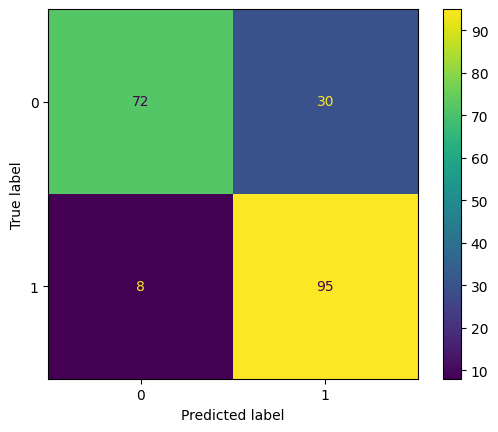

In [13]:
ConfusionMatrixDisplay.from_estimator(svm_linear,x_test,y_test)
plt.show()

In [14]:
# Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

In [15]:
print("Accuracy:",accuracy_score(y_test,y_pred_poly))

Accuracy: 0.9073170731707317


In [16]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       102
           1       0.86      0.98      0.91       103

    accuracy                           0.91       205
   macro avg       0.92      0.91      0.91       205
weighted avg       0.92      0.91      0.91       205



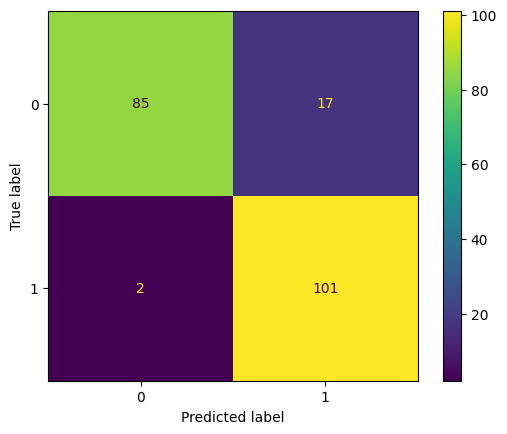

In [17]:
ConfusionMatrixDisplay.from_estimator(svm_poly,x_test,y_test)
plt.show()

In [18]:
# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [19]:
print("Accuracy:",accuracy_score(y_test,y_pred_rbf))
print(classification_report(y_test,y_pred_rbf))

Accuracy: 0.8878048780487805
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



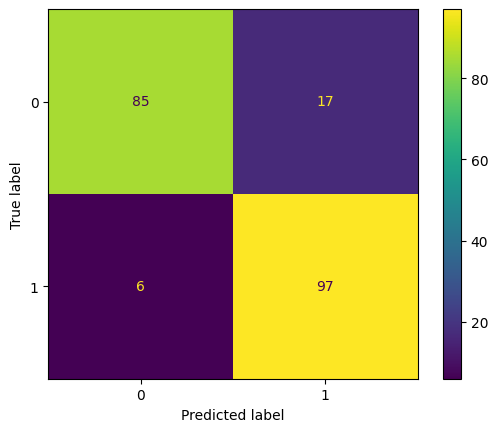

In [20]:
ConfusionMatrixDisplay.from_estimator(svm_rbf,x_test,y_test)
plt.show()

In [21]:
svm_rbf_gamma=SVC(kernel='rbf',gamma='scale',C=1)
svm_rbf_gamma.fit(x_train,y_train)
y_pred_rbf_gamma=svm_rbf_gamma.predict(x_test)

In [22]:
print("Accuracy:",accuracy_score(y_test,y_pred_rbf_gamma))
print(classification_report(y_test,y_pred_rbf_gamma))

Accuracy: 0.8878048780487805
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



# **Loan Prediction**

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 5.98MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/loan-prediction-problem-dataset/versions/1


In [24]:
import os
os.listdir(path)

['test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv']

In [25]:
data=pd.read_csv(path+'/train_u6lujuX_CVtuZ9i.csv')

In [26]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [29]:
data['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


In [30]:
data['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [31]:
data['Credit_History'].isnull().sum()/len(data['Credit_History'])*100

np.float64(8.143322475570033)

In [32]:
data=data.dropna(subset=['Gender','Married','Loan_Amount_Term'])

In [33]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,11
Education,0
Self_Employed,31
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,0


In [34]:
data.loc[:, 'LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data.loc[:, 'Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [35]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,11
Education,0
Self_Employed,31
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [36]:
data.loc[:,'Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data.loc[:,'Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [37]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [38]:
label_encoders={}
for col in data.select_dtypes(include=['object']).columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoders[col]=le

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [40]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

In [41]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [42]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [45]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train_scaled, y_train)
y_pred_linear = svm_linear.predict(x_test_scaled)

In [46]:
print("Accuracy :",accuracy_score(y_test,y_pred_linear))

Accuracy : 0.8461538461538461


In [47]:
print(classification_report(y_test,y_pred_linear))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        31
           1       0.83      1.00      0.91        86

    accuracy                           0.85       117
   macro avg       0.91      0.71      0.75       117
weighted avg       0.87      0.85      0.82       117



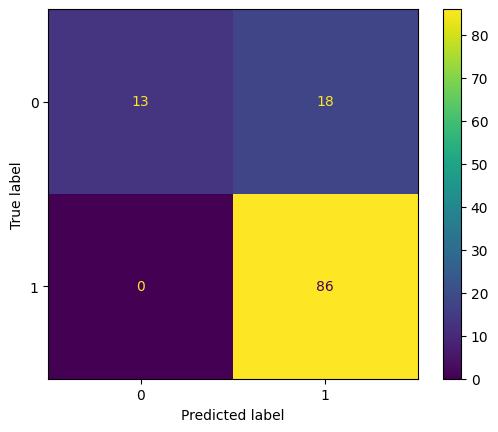

In [48]:
ConfusionMatrixDisplay.from_estimator(svm_linear,x_test_scaled,y_test)
plt.show()

In [49]:
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(x_train_scaled, y_train)
y_pred_poly = svm_poly.predict(x_test_scaled)

In [50]:
print("Accuracy :",accuracy_score(y_test,y_pred_poly))

Accuracy : 0.8205128205128205


In [51]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.81      0.42      0.55        31
           1       0.82      0.97      0.89        86

    accuracy                           0.82       117
   macro avg       0.82      0.69      0.72       117
weighted avg       0.82      0.82      0.80       117



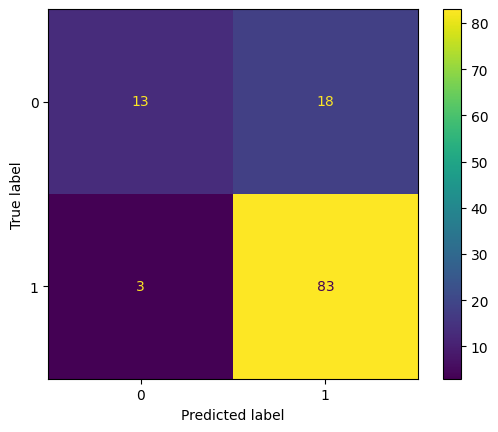

In [52]:
ConfusionMatrixDisplay.from_estimator(svm_poly,x_test_scaled,y_test)
plt.show()

In [53]:
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(x_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(x_test_scaled)

In [54]:
print("Accuracy :",accuracy_score(y_test,y_pred_rbf))

Accuracy : 0.8461538461538461


In [55]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        31
           1       0.83      1.00      0.91        86

    accuracy                           0.85       117
   macro avg       0.91      0.71      0.75       117
weighted avg       0.87      0.85      0.82       117



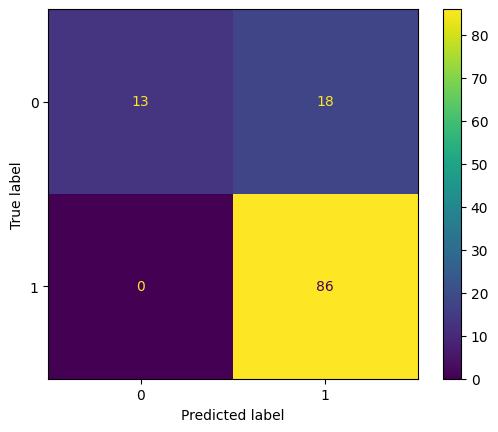

In [56]:
ConfusionMatrixDisplay.from_estimator(svm_rbf,x_test_scaled,y_test)
plt.show()